# pySand
##### Erosion examples

In [1]:
from pysand.erosion import bend, reducer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Single point erosion rate calculation

Input parameters:

In [2]:
v_m = 17  # Mix velocity [m/s]
rho_m = 100  # Mix density [kg/m3]
mu_m = 1e-3  # Mix viscosity [kg/ms]
Q_s = 1.5  # Sand production rate [g/s]
R = 3  # Bend-radius [# ID's]
GF = 2  # Geometry factor [-]
D = .12  # Pipe diameter [m]
d_p = .2  # Particle diameter [mm]

Bend erosion rate [mm/year]:

In [3]:
bend(v_m, rho_m, mu_m, Q_s, R, GF, D, d_p)

1.1891491217238939

Reducer erosion rate [mm/year]

In [4]:
D2 = .1  # Downstream pipe diameter [m]
reducer(v_m, rho_m, Q_s, D, D2, d_p, GF=GF, alpha=20)

1.7800001066918263

### Project erosion prediction

Creating some example data (can be imported from csv etc):

In [5]:
df = pd.DataFrame({'v_m': [14.2, 14.5, 15.7, 18.2, 19.9, 20.8, 20.3],
                   'rho_m': [300, 290, 290, 280, 230, 400, 450]},
                   index=list(range(2023, 2030)))
df

,v_m,rho_m
2023,14.2,300
2024,14.5,290
2025,15.7,290
2026,18.2,280
2027,19.9,230
2028,20.8,400
2029,20.3,450


Applying bend erosion model on every row in dataset (every year) and cumulative function:

In [6]:
df['erosion'] = df.apply(lambda row: bend(row['v_m'], row['rho_m'], mu_m, Q_s, R, GF, D, d_p), axis=1)
df['cum_erosion'] = df['erosion'].cumsum()
df

,v_m,rho_m,erosion,cum_erosion
2023,14.2,300,0.351722,0.351722
2024,14.5,290,0.381549,0.733271
2025,15.7,290,0.474650,1.207921
2026,18.2,280,0.730000,1.937921
2027,19.9,230,1.072020,3.009941
2028,20.8,400,0.810993,3.820934
2029,20.3,450,0.694982,4.515916


In [7]:
print('Total erosion:', np.round(df['erosion'].sum(), 2), 'mm')

Total erosion: 4.52 mm


Plotting the results:

Text(0.5, 1.0, 'Erosion prediction for Lorum Ipsum')

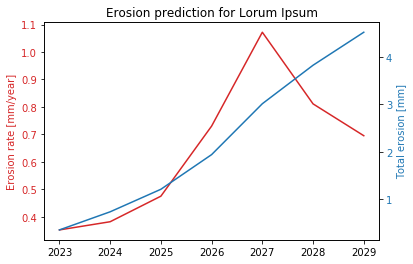

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(df['erosion'], label='erosion rate', color=color)
ax1.set_ylabel('Erosion rate [mm/year]', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(df['cum_erosion'], label='cumulative erosion', color=color)
ax2.set_ylabel('Total erosion [mm]', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Erosion prediction for Lorem Ipsum')

Pipe diameter sensitivity study

Text(0.5, 1.0, 'Cumulative erosion - pipe diameter sensitivity')

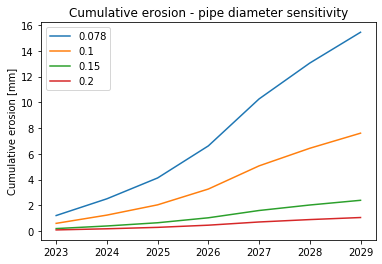

In [9]:
diameters = [0.078, 0.1, 0.15, 0.2]

for D in diameters:
    plt.plot(df.apply(lambda row: bend(row['v_m'], row['rho_m'], mu_m, Q_s, R, GF, D, d_p), axis=1).cumsum(), label=D)
plt.legend()
plt.ylabel('Cumulative erosion [mm]')
plt.title('Cumulative erosion - pipe diameter sensitivity')